<a href="https://colab.research.google.com/github/AlvinChiew/MachineLearning/blob/main/Sklearn_Classifier_Ensemble_GBT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Modules

In [1]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

# Load Data & PreProcessing

In [2]:
data_obj = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data_obj.data, data_obj.target, random_state=0)

# Modeling

## default config

In [6]:
model = GradientBoostingClassifier(random_state=0)
model.fit(X_train, y_train)
print(f'Train score : {model.score(X_train, y_train)}')
print(f'Test score : {model.score(X_test, y_test)}')

# seems overfitting

Train score : 1.0
Test score : 0.965034965034965


## reduce learning rate

In [12]:
model = GradientBoostingClassifier(random_state=0, learning_rate=0.0095)
model.fit(X_train, y_train)
print(f'Train score : {model.score(X_train, y_train)}')
print(f'Test score : {model.score(X_test, y_test)}')

# both train and test score dropped with no sign of increment in between learning rate 0.0095 to 0.1 . 

Train score : 0.9882629107981221
Test score : 0.958041958041958


# limit tree depth

In [13]:
model = GradientBoostingClassifier(random_state=0, max_depth=1)
model.fit(X_train, y_train)
print(f'Train score : {model.score(X_train, y_train)}')
print(f'Test score : {model.score(X_test, y_test)}')

# less overfitting, better prediction in test set

Train score : 0.9906103286384976
Test score : 0.972027972027972


# Feature Analysis

In [14]:
ft_importance = list(zip(data_obj.feature_names, model.feature_importances_))
ft_importance.sort(key = lambda x : x[1], reverse=True)
ft_importance

[('worst perimeter', 0.3224957882795973),
 ('mean concave points', 0.26568690742159873),
 ('worst concave points', 0.23145067517162501),
 ('worst area', 0.09242499264166963),
 ('worst texture', 0.01618199352051874),
 ('area error', 0.014583825516250178),
 ('worst radius', 0.009239393827675236),
 ('mean texture', 0.009075299587065672),
 ('mean concavity', 0.008320357663276368),
 ('worst concavity', 0.006851011082513831),
 ('worst smoothness', 0.006440411045489717),
 ('worst symmetry', 0.006415007904773571),
 ('concavity error', 0.0047546910576471485),
 ('worst fractal dimension', 0.0034222507087997766),
 ('smoothness error', 0.0010508324305001254),
 ('symmetry error', 0.0009568904214311666),
 ('mean symmetry', 0.0003495883413153316),
 ('texture error', 0.00030008337825242307),
 ('mean radius', 0.0),
 ('mean perimeter', 0.0),
 ('mean area', 0.0),
 ('mean smoothness', 0.0),
 ('mean compactness', 0.0),
 ('mean fractal dimension', 0.0),
 ('radius error', 0.0),
 ('perimeter error', 0.0),
 ('

## Plot resut

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


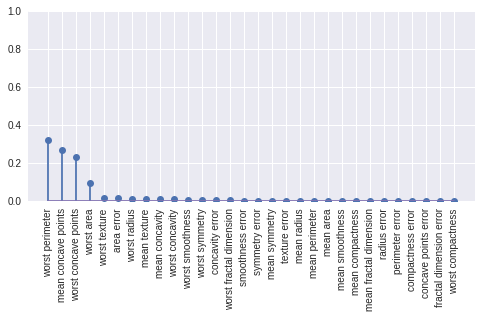

In [15]:
plt.style.use('seaborn')
plt.stem([x[1] for x in ft_importance])
plt.xticks(range(len(ft_importance)), [x[0] for x in ft_importance], rotation=90)
plt.ylim([0,1])
plt.gcf().subplots_adjust(bottom=0.4)
plt.show()

# seems like concluding different result comparing with result from decision tree prediction model